In [1]:
#    импорт библиотек
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#    чтение датасета
#    можно взять здесь - https://www.kaggle.com/competitions/boston-housing/overview
data = np.genfromtxt('./housing.csv')

<Axes: >

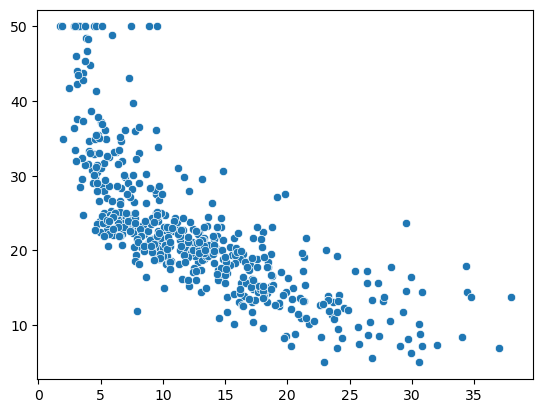

In [3]:
#    12-й индекс: LSTAT - % lower status of the population
#    13-й индекс (target): MEDV - Median value of owner-occupied homes in $1000's 
sns.scatterplot(x=data[:,12], y=data[:,13])

In [4]:
#    удаление выбросов
data = data[data[:,13]<50]
#data = data[(data[:,5]<8.5) & (data[:,5]>4)]

<Axes: >

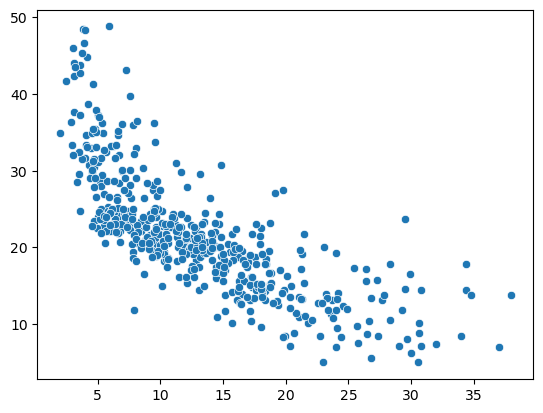

In [5]:
sns.scatterplot(x=data[:,12], y=data[:,13])

In [6]:
#    преобразование данных в тензоры и решейп
X = torch.from_numpy(data[:,12].astype(np.float32))
y = torch.from_numpy(data[:,13].astype(np.float32))

X = X.view(X.shape[0], 1)
y = y.view(y.shape[0], 1)

In [7]:
X.shape, y.shape

(torch.Size([490, 1]), torch.Size([490, 1]))

In [8]:
#    класс для линейной регрессии
class Linear_Regressor(torch.nn.Module):
    def __init__(self):
        super(Linear_Regressor, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [9]:
#    выбор модели, loss-функции и оптимизатора
model = Linear_Regressor()
loss_fn = torch.nn.L1Loss() # MAE
trainer = torch.optim.Adam(model.parameters(), lr=1)

In [10]:
#    тренировка модели
num_epochs = 100
loss_list = []

for epoch in range(num_epochs):
    trainer.zero_grad()
    
    y_pred = model(X)
    
    loss = loss_fn(y_pred, y)
    loss_list.append(loss.item())
    loss.backward()
    
    trainer.step()
      
    if (epoch+1) % (num_epochs/10) == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

epoch: 10, loss: 11.7891
epoch: 20, loss: 11.1444
epoch: 30, loss: 7.8639
epoch: 40, loss: 5.3129
epoch: 50, loss: 3.9303
epoch: 60, loss: 3.7035
epoch: 70, loss: 3.7509
epoch: 80, loss: 3.7114
epoch: 90, loss: 3.6798
epoch: 100, loss: 3.6774


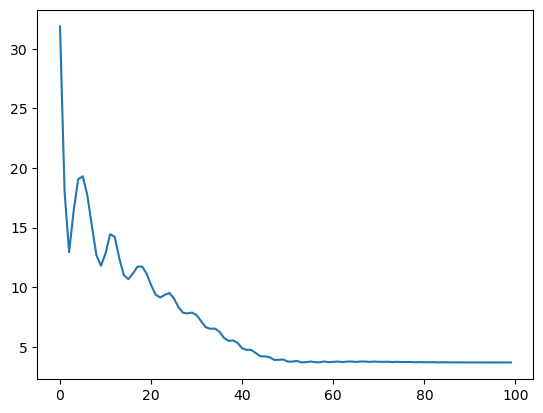

In [11]:
#    как уменьшался loss
sns.lineplot(loss_list);

<Axes: >

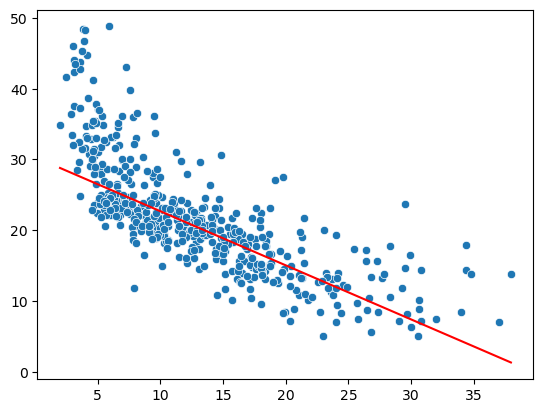

In [12]:
#    результат
y_pred = model(X).detach().numpy()
sns.scatterplot(x=data[:,12], y=data[:,13])
sns.lineplot(x=data[:,12], y=y_pred.reshape(-1), color='red')